In [1]:
import re
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
%matplotlib inline

### Parse logfiles for first three subjects (z1, KL, and AS), 2015

In [2]:
subjects = {}

probe_images_path = '/home/tnaselar/FAST/imagery_psychophysics/multi_poly_probes/'

subjects['KL'] = {}
subjects['KL']['sourcefile'] = probe_images_path+'data/KL_2015_May_05_0828.log'

subjects['z1'] = {}
subjects['z1']['sourcefile'] = probe_images_path+'data/z1_2015_May_05_1518.log'

subjects['AS'] = {}
subjects['AS']['sourcefile'] = probe_images_path+'data/AS_2015_May_13_1320.log'


# subjects['CP'] = {}
# subjects['CP']['sourcefile'] = probe_images_path+'data/CP_2014_Nov_14_1513.log'

save_path = 'foo'# /media/tnaselar/Data/scratch/'

max_images_per_exp = 4


imagery_marker = '_img_'
perception_marker = '_pcp_'

subject_table = pd.DataFrame(subjects)

number_of_lines_in_chunk = 3

In [3]:
subject_table

,AS,KL,z1
sourcefile,/home/tnaselar/FAST/imagery_psychophysics/mult...,/home/tnaselar/FAST/imagery_psychophysics/mult...,/home/tnaselar/FAST/imagery_psychophysics/mult...


In [4]:
def starts_a_response_chunk(x):
    if 'New trial' in x:
        return True
    else:
        return False

def get_probe_number(new_line):
    return '_'.join(re.search('_probe\((.*?)\).png', new_line).group(1).split(','))
#     dx = new_line.index('_probe(')
#     if new_line[dx-2].isdigit():
#         return int(new_line[dx-2:dx])
#     else:
#         return int(new_line[dx-1])
    
# def get_repetition(new_line):
#     return int(new_line[new_line.index('rep=')+4])

def get_state(new_line):
    dx = new_line.index('probe(')
    state = new_line[dx-4:dx-1]
    if state:
        return state
    else:
        raise Exception('you are not at the start of a new trial')
#     if 'just-probes' in new_line:
#         return 'img'
#     elif 'probes-with-im' in new_line:
#         return 'pcp'
#     else:
        

def get_time_stamp(new_line):
    return float(new_line[0:new_line.index('\t')])

def get_response(new_line):
    try:
        return int(new_line[new_line.index('Keypress')+10])
    except:
        print('subject did not respond, returning None')
        return None
        
def skip_a_line(all_lines):
    return all_lines.pop(0)

def get_image(new_line):
    return re.search('poly_probes/probes/(.*?_\d\d)', new_line).group(1)
#     dx = new_line.index('finalprobeset')
#     return new_line[dx:(dx+15)]

In [5]:
f = '/musc.repo/Data/tnaselar/imagery_psychophysics/multi_poly_probes/probes/candle_01_letterbox_img_probe(1,11).png'
snippet = '27.9541	DATA	Keypress: 2'
print get_time_stamp(snippet)
print 'state: %s' %(get_state(f))
print get_response(snippet)
print get_image(f)

27.9541
state: img
2
candle_01


In [6]:
data_dict = {'subj': [], 'image': [], 'probe': [], 'state': [], 'image_on': [], 'resp_on': [], 'response': []}
for subj in subjects.keys():
    print subj    
    all_lines = open(subjects[subj]['sourcefile'], 'r').readlines()
    while all_lines:
        new_line = all_lines.pop(0)
        if starts_a_response_chunk(new_line):
            data_dict['subj'].append(subj)
            new_line = all_lines.pop(0)
            if new_line.find('WARNING') > 0:
                _ = skip_a_line(all_lines)
            new_line = all_lines.pop(0)
            data_dict['probe'].append(get_probe_number(new_line))
            data_dict['state'].append(get_state(new_line))  
            data_dict['image'].append(get_image(new_line))
            data_dict['image_on'].append(get_time_stamp(all_lines.pop(0)))
            new_line = all_lines.pop(0)
            data_dict['resp_on'].append(get_time_stamp(new_line))
            data_dict['response'].append(get_response(new_line))
            


probe_exp = pd.DataFrame(data_dict)



AS
z1
subject did not respond, returning None
KL


In [7]:
probe_exp.head()

,image,image_on,probe,resp_on,response,state,subj
0,candle_01,117.5410,11_12_21,127.8745,3.0,img,AS
1,candle_01,127.9244,15_7_16,139.0581,2.0,img,AS
2,candle_01,139.1078,32_24_33,151.4748,2.0,img,AS
3,candle_01,151.5415,37,156.2748,2.0,img,AS
4,candle_01,156.3414,18_10_19,163.0749,2.0,img,AS


In [24]:
AS = probe_exp[probe_exp['subj']=='AS']
mins =  (AS.iloc[-1].resp_on-AS.iloc[0].resp_on)/60.
print 'AS time: %f hrs, %f min' %(np.floor_divide(mins,60.), np.remainder(mins,60.))

mins =  (z1.iloc[-1].resp_on-z1.iloc[0].resp_on)/60.
print 'z1 time: %f hrs, %f min' %(np.floor_divide(mins,60.), np.remainder(mins,60.))


AS time: 1.000000 hrs, 27.366363 min
z1 time: 2.000000 hrs, 8.710068 min


In [21]:
np.remainder(mins, 60)

27.36636333333334

In [ ]:
probe_exp.describe()

In [ ]:
probe_exp.dtypes

In [ ]:
probe_exp[0:3]

In [ ]:
probe_exp[:3]

In [ ]:
print probe_exp.loc[1]
print type(probe_exp.loc[1])


In [28]:
diff = probe_exp.resp_on - probe_exp.image_on
diff.describe()

count    5520.000000
mean        3.612467
std         3.803842
min         0.400100
25%         1.366900
50%         2.566800
75%         4.566900
max        79.367500
dtype: float64

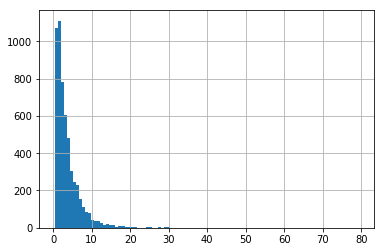

In [30]:
diff.hist(bins=100)

In [33]:
345*2.57/60.*4

59.11

In [13]:
probe_exp.loc[:, ['probe', 'response']].head()

,probe,response
0,11_12_21,3.0
1,15_7_16,2.0
2,32_24_33,2.0
3,37,2.0
4,18_10_19,2.0


In [14]:
probe_exp.iloc[0]

image       candle_01
image_on      117.541
probe        11_12_21
resp_on       127.874
response            3
state             img
subj               AS
Name: 0, dtype: object

In [15]:
probe_exp.iloc[0:2, 1:3]

,image_on,probe
0,117.5410,11_12_21
1,127.9244,15_7_16


In [16]:
probe_exp[probe_exp['probe']=='40_41']


,image,image_on,probe,resp_on,response,state,subj
26,candle_01,283.9259,40_41,285.1594,1.0,img,AS
378,candle_01,1538.8042,40_41,1539.5710,1.0,pcp,AS
1006,peaches_05,3213.1031,40_41,3215.9365,3.0,img,AS
1232,peaches_05,4546.5653,40_41,4550.3321,3.0,pcp,AS
1591,candle_01,803.5566,40_41,804.7902,1.0,img,z1
1791,candle_01,1565.4468,40_41,1566.8470,1.0,pcp,z1
2257,peaches_05,4799.3098,40_41,4805.6099,3.0,img,z1
2432,peaches_05,5808.1190,40_41,5816.0192,4.0,pcp,z1
2954,candle_01,254.2740,40_41,255.3074,2.0,img,KL
3270,candle_01,559.5102,40_41,560.2103,1.0,pcp,KL


In [17]:
probe_exp[probe_exp.probe.isin(['40','41','40_41'])]

,image,image_on,probe,resp_on,response,state,subj
26,candle_01,283.9259,40_41,285.1594,1.0,img,AS
119,candle_01,613.5290,41,614.1957,1.0,img,AS
220,candle_01,962.8822,40,964.6157,1.0,img,AS
367,candle_01,1516.5707,40,1518.2042,1.0,pcp,AS
378,candle_01,1538.8042,40_41,1539.5710,1.0,pcp,AS
617,candle_01,2107.1595,41,2107.8263,1.0,pcp,AS
739,peaches_05,2502.4132,41,2505.2133,3.0,img,AS
797,peaches_05,2650.7145,40,2653.1147,2.0,img,AS
1006,peaches_05,3213.1031,40_41,3215.9365,3.0,img,AS
1127,peaches_05,3880.8926,41,3883.2927,2.0,pcp,AS


In [18]:
KL = probe_exp[probe_exp.subj=='KL']
KL.sort(columns='probe')[0:6]

/home/tnaselar/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,image,image_on,probe,resp_on,response,state,subj
5421,grape_juice_02,9967.8963,0,9969.5631,2.0,pcp,KL
2762,candle_01,29.4041,0,30.2376,1.0,img,KL
4276,cheeseburger_03,6080.2275,0,6082.1943,2.0,img,KL
4746,cheeseburger_03,7709.0423,0,7710.8758,2.0,pcp,KL
3481,peaches_05,999.1809,0,1002.3144,2.0,img,KL
4045,peaches_05,5081.0017,0,5082.4352,1.0,pcp,KL


In [19]:
#probe_exp.to_pickle(os.path.join(save_path+'multi_poly_probe_data_3_subjects.pkl'))